
# Project: Investigate a Dataset (TMDB!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This project will investigate some facts about movies rated in The Movies Database aka TMDB, we will make a tiny study by the way of visualising the database in order to reach some information about the movies
#mainly we need to know about the most produced genres, and the relation between release year of the movie and the profit
#we will search using two questions
#1st question: What is the most produced genre?
#2nd question: What is the relation between release year and profit?

In [434]:
# firstly we must import the libraries we would use, which would be Numpy, Pandas, Matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [435]:
# Loading data
df = pd.read_csv('tmdb-movies.csv')

In [436]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [437]:
#we may notice that some columns that are null in a way that cant be predicted of filled with mean value,
#there is an idea to drop rows with some null values but the question here is about the data after dropping: is these rows are equally distributed among years, cast, genres, budgets? 
#then dropping these rows may make the dataset not in the power that is gathered for also these columns are away from our questions

In [438]:
# by vision in manual exploring the data in Ms exel I found that there are some values in revenue or budget is zero
# we will replace it with nan
money=['budget', 'revenue']
df[money] = df[money].replace(0, np.NAN)

Text(159.0, 0.5, 'movie order in the lest')

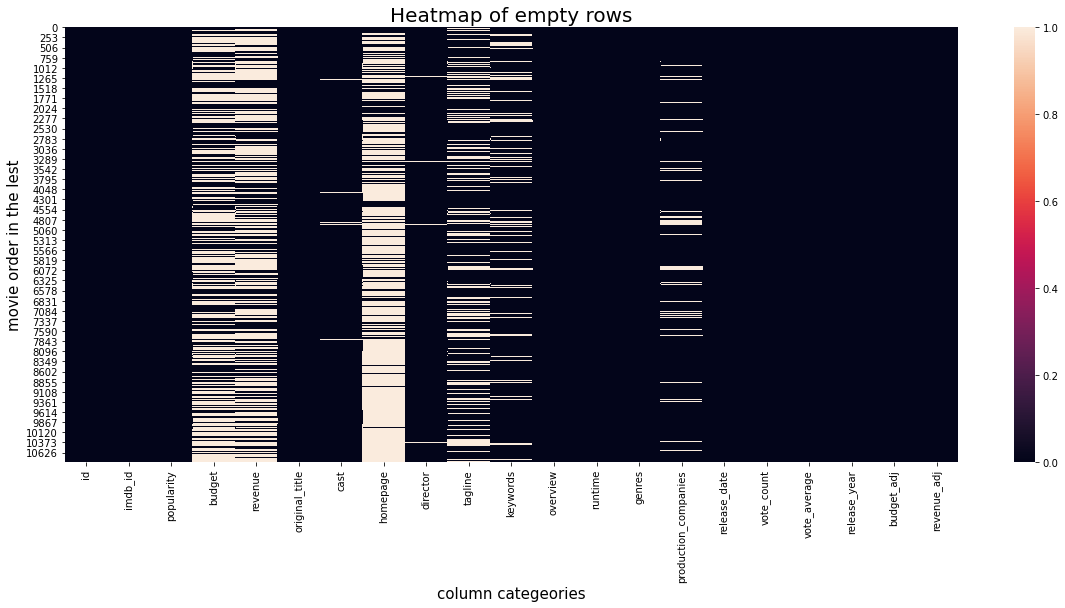

In [439]:
sns.heatmap(df.isnull())
plt.title('Heatmap of empty rows', fontsize = 20) # title with fontsize 20
plt.xlabel('column categeories', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('movie order in the lest', fontsize = 15) # y-axis label with fontsize 15

In [440]:
#remove duplicated rows
df.drop_duplicates(keep ='first', inplace=True)
rows, col = df.shape

print('There are now {} total entries of movies and {} no.of columns in it.'.format(rows-1, col))

There are now 10864 total entries of movies and 21 no.of columns in it.


In [441]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [442]:
# we need first to add column for profit.
# This column is the change between renue and bidget
df["profit"]= df["revenue"]-df["budget"]


In [443]:
#Now dropping these NA values because any other technique(replacing with mean, last value etc.) doesn't make sense
df.dropna(axis=0, inplace=True)

In [444]:
#The heatmap shows that rows containing null values arent equally distributed to the extemt to remove it , I ll work with the data as it is

In [445]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Which genre is moe produced over years?!)

In [446]:
#We will extract genres free irtems from the genres column as its written compacted
# a function to use
def free_items(column_name):
    #will select a column, and separate the string by '|'
    data =df[column_name].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #Then we will output them sorted in dec order
    count = data.value_counts(ascending = False)
    
    return count

In [447]:
#now we will use the function we made
genre_count = free_items('genres')
#shwoing top 5 genres
genre_count.head()

Drama        535
Action       415
Comedy       414
Thriller     399
Adventure    297
dtype: int64

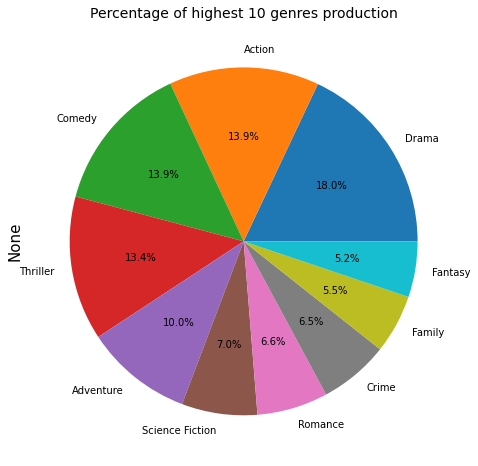

In [449]:
#we will use pie chart to examine how such the defference in genres
genre_count.head(10).plot.pie(autopct="%.1f%%")
plt.title("Percentage of highest 10 genres production", fontsize=14);

In [450]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.852382e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09


In [451]:
df_gen=df[["genres","release_year"]]
df_gen.head()

,genres,release_year
0,Action|Adventure|Science Fiction|Thriller,2015
1,Action|Adventure|Science Fiction|Thriller,2015
2,Adventure|Science Fiction|Thriller,2015
3,Action|Adventure|Science Fiction|Fantasy,2015
4,Action|Crime|Thriller,2015


In [452]:
df_gens = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))


In [453]:
df_gens.head()

,genres_1,genres_2,genres_3,genres_4,genres_5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [454]:
df_genre=pd.concat([df_gen, df_gens], axis=1, join='inner')
df_genre.drop("genres", axis='columns', inplace=True)
df_genre.head()

,release_year,genres_1,genres_2,genres_3,genres_4,genres_5
0,2015,Action,Adventure,Science Fiction,Thriller,None
1,2015,Action,Adventure,Science Fiction,Thriller,None
2,2015,Adventure,Science Fiction,Thriller,None,None
3,2015,Action,Adventure,Science Fiction,Fantasy,None
4,2015,Action,Crime,Thriller,None,None


array([[<AxesSubplot:title={'center':'release_year'}>]], dtype=object)

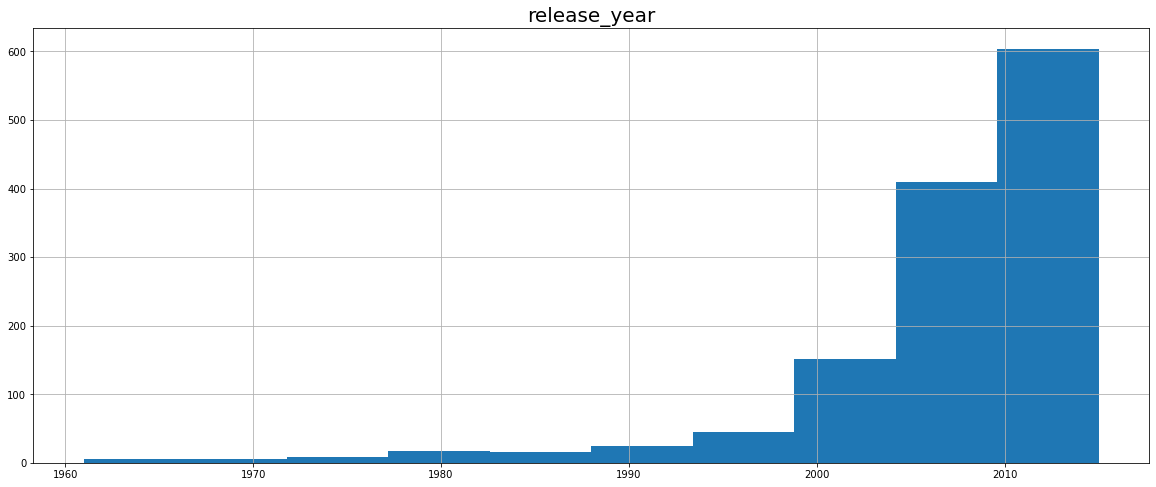

In [455]:
df_genre.hist()

In [456]:
df_genre.head()

,release_year,genres_1,genres_2,genres_3,genres_4,genres_5
0,2015,Action,Adventure,Science Fiction,Thriller,None
1,2015,Action,Adventure,Science Fiction,Thriller,None
2,2015,Adventure,Science Fiction,Thriller,None,None
3,2015,Action,Adventure,Science Fiction,Fantasy,None
4,2015,Action,Crime,Thriller,None,None


In [457]:
#we can notice that comedy is much more produced than horror, action is much more than romance

### Research Question 2  (How such release year affect profit? )

Text(0.5, 1.0, 'profit over years')

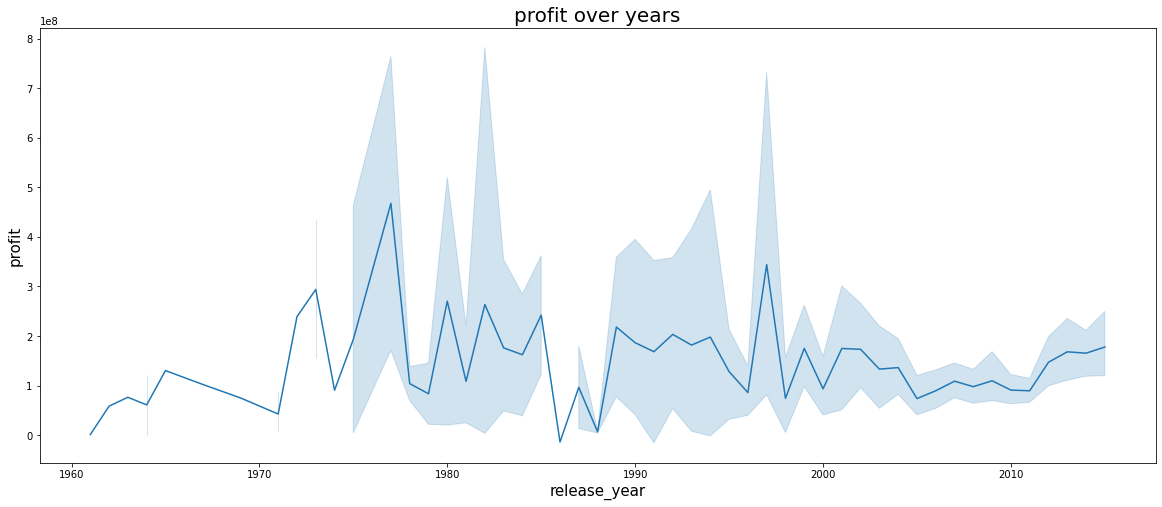

In [458]:
# we can clearly solve this question by the line plot
sns.lineplot(data=df, x="release_year", y="profit")
plt.title("profit over years")

In [459]:
#we can notice that profit is incresing more smooth in the last few years while in the 70,80 decades it was strongly up and down

<a id='conclusions'></a>
# Conclusions

In [ ]:
#By analyzing the dataset in the light of the first two questions we find that the most produces genres are Drama, Action and comedy,
# The most profitable year is 1977, the trend is increasing in the last years